In [1]:
# Import necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print data shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


In [3]:
# Define a shallow neural network
def create_shallow_model():
    model = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(10, activation='softmax')  # 10 classes
    ])
    return model

# Create and summarize the model
model = create_shallow_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [4]:
#1-	SGD with Warm Restarts
# Define learning rate schedule for warm restarts
def warm_restart_schedule(epoch, lr):
    T_0 = 10  # Number of epochs for the first restart
    T_mult = 2  # Factor by which epochs increase after each restart
    T_current = epoch % (T_0 * T_mult)
    return lr * 0.5 ** (T_current // T_0)

# Compile the model with SGD and Warm Restarts
model_sgd_wr = create_shallow_model()
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
model_sgd_wr.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_sgd_wr = model_sgd_wr.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024,
    callbacks=[LearningRateScheduler(warm_restart_schedule)]
)
end_time = time.time()

# Record training time
sgd_wr_training_time = end_time - start_time
print(f"Training time with SGD with Warm Restarts: {sgd_wr_training_time:.2f} seconds")


Epoch 1/100
25/25 [==============================] - 3s 64ms/step - loss: 2.1845 - accuracy: 0.2063 - val_loss: 2.0274 - val_accuracy: 0.2680 - lr: 0.0100
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 1.9289 - accuracy: 0.3198 - val_loss: 1.8920 - val_accuracy: 0.3414 - lr: 0.0100
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 1.8613 - accuracy: 0.3506 - val_loss: 1.8810 - val_accuracy: 0.3428 - lr: 0.0100
Epoch 4/100
25/25 [==============================] - 1s 21ms/step - loss: 1.8393 - accuracy: 0.3594 - val_loss: 1.8687 - val_accuracy: 0.3384 - lr: 0.0100
Epoch 5/100
25/25 [==============================] - 1s 22ms/step - loss: 1.8155 - accuracy: 0.3697 - val_loss: 1.8329 - val_accuracy: 0.3632 - lr: 0.0100
Epoch 6/100
25/25 [==============================] - 1s 25ms/step - loss: 1.7989 - accuracy: 0.3800 - val_loss: 1.8180 - val_accuracy: 0.3714 - lr: 0.0100
Epoch 7/100
25/25 [==============================] - 1s 25ms/step - lo

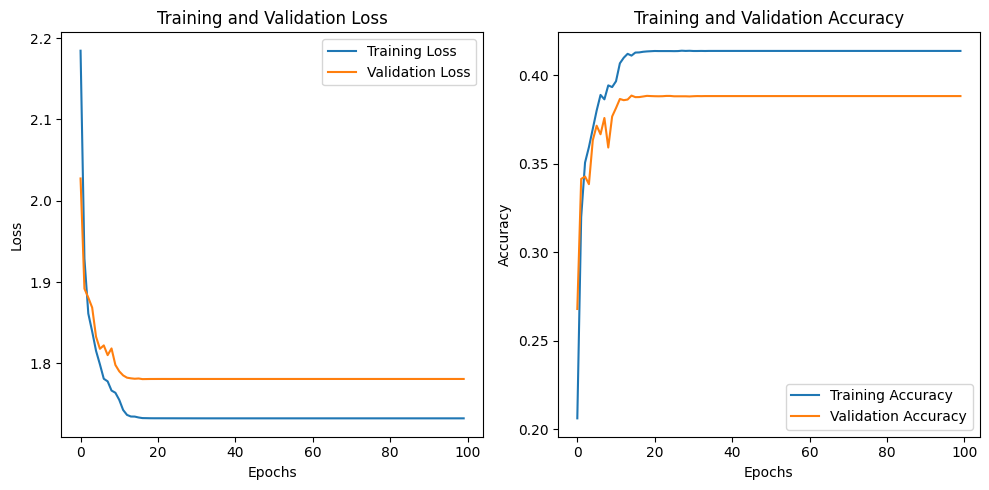

In [5]:
#Visualize SGD with Warm Restarts Training History

# Plot training & validation loss values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_sgd_wr.history['loss'], label='Training Loss')
plt.plot(history_sgd_wr.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_sgd_wr.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd_wr.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
#2-	Nesterov Accelerated Gradient (NAG)
# Compile the model with NAG
model_nag = create_shallow_model()
nag_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_nag.compile(optimizer=nag_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_nag = model_nag.fit(
    x_train, y_train,
    epochs=100,
    batch_size=1024,
    validation_split=0.5
)
end_time = time.time()

# Record training time
nag_training_time = end_time - start_time
print(f"Training time with Nesterov Accelerated Gradient: {nag_training_time:.2f} seconds")


Epoch 1/100
25/25 [==============================] - 2s 54ms/step - loss: 2.1215 - accuracy: 0.2295 - val_loss: 1.9815 - val_accuracy: 0.2972
Epoch 2/100
25/25 [==============================] - 1s 28ms/step - loss: 1.9139 - accuracy: 0.3320 - val_loss: 1.8960 - val_accuracy: 0.3404
Epoch 3/100
25/25 [==============================] - 1s 24ms/step - loss: 1.8594 - accuracy: 0.3565 - val_loss: 1.8639 - val_accuracy: 0.3518
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 1.8275 - accuracy: 0.3690 - val_loss: 1.8577 - val_accuracy: 0.3468
Epoch 5/100
25/25 [==============================] - 1s 24ms/step - loss: 1.8111 - accuracy: 0.3751 - val_loss: 1.8607 - val_accuracy: 0.3444
Epoch 6/100
25/25 [==============================] - 1s 24ms/step - loss: 1.7941 - accuracy: 0.3824 - val_loss: 1.8272 - val_accuracy: 0.3576
Epoch 7/100
25/25 [==============================] - 1s 23ms/step - loss: 1.7832 - accuracy: 0.3852 - val_loss: 1.8314 - val_accuracy: 0.3506
Epoch 

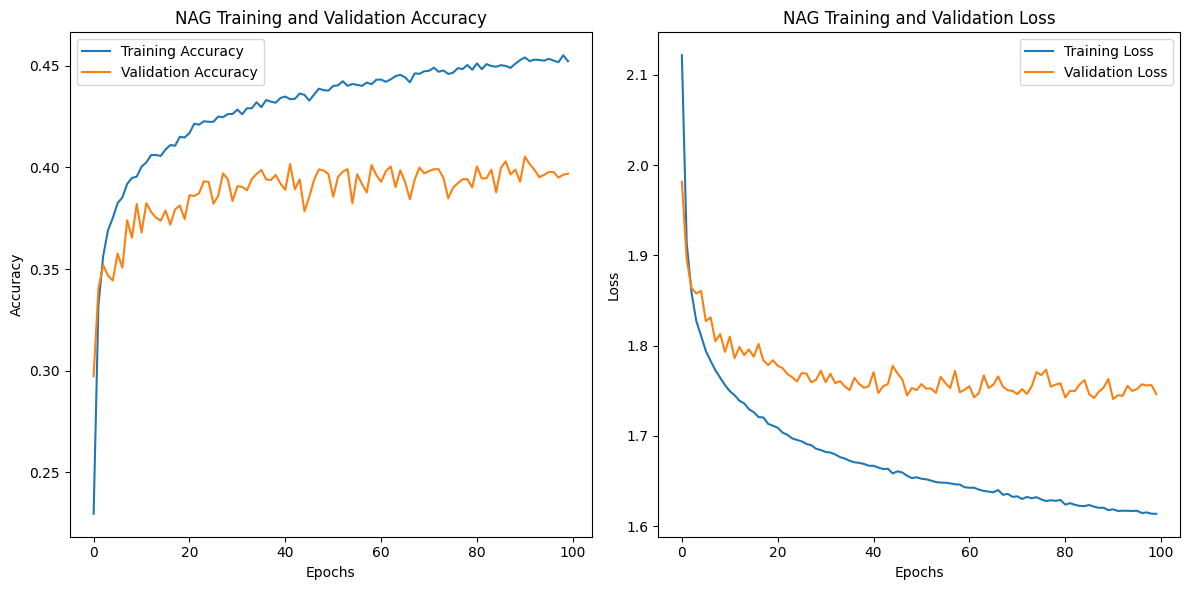

In [7]:
#Visualize NAG Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_nag.history['accuracy'], label='Training Accuracy')
plt.plot(history_nag.history['val_accuracy'], label='Validation Accuracy')
plt.title('NAG Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_nag.history['loss'], label='Training Loss')
plt.plot(history_nag.history['val_loss'], label='Validation Loss')
plt.title('NAG Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#3- Adagrad Optimizer
from tensorflow.keras.optimizers import Adagrad

# Compile the model with Adagrad
model_adagrad = create_shallow_model()
adagrad_optimizer = Adagrad(learning_rate=0.01)
model_adagrad.compile(optimizer=adagrad_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_adagrad = model_adagrad.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024
)
end_time = time.time()

# Record training time
adagrad_training_time = end_time - start_time
print(f"Training time with Adagrad: {adagrad_training_time:.2f} seconds")


Epoch 1/100
25/25 [==============================] - 2s 54ms/step - loss: 2.3153 - accuracy: 0.1664 - val_loss: 2.1365 - val_accuracy: 0.2563
Epoch 2/100
25/25 [==============================] - 1s 25ms/step - loss: 2.1326 - accuracy: 0.2318 - val_loss: 2.1350 - val_accuracy: 0.2254
Epoch 3/100
25/25 [==============================] - 1s 25ms/step - loss: 2.0125 - accuracy: 0.2830 - val_loss: 2.0458 - val_accuracy: 0.2762
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 1.9599 - accuracy: 0.3070 - val_loss: 1.9654 - val_accuracy: 0.2958
Epoch 5/100
25/25 [==============================] - 1s 24ms/step - loss: 1.9426 - accuracy: 0.3084 - val_loss: 1.9823 - val_accuracy: 0.2770
Epoch 6/100
25/25 [==============================] - 1s 24ms/step - loss: 1.9193 - accuracy: 0.3248 - val_loss: 1.9067 - val_accuracy: 0.3389
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss: 1.8835 - accuracy: 0.3447 - val_loss: 1.9054 - val_accuracy: 0.3306
Epoch 

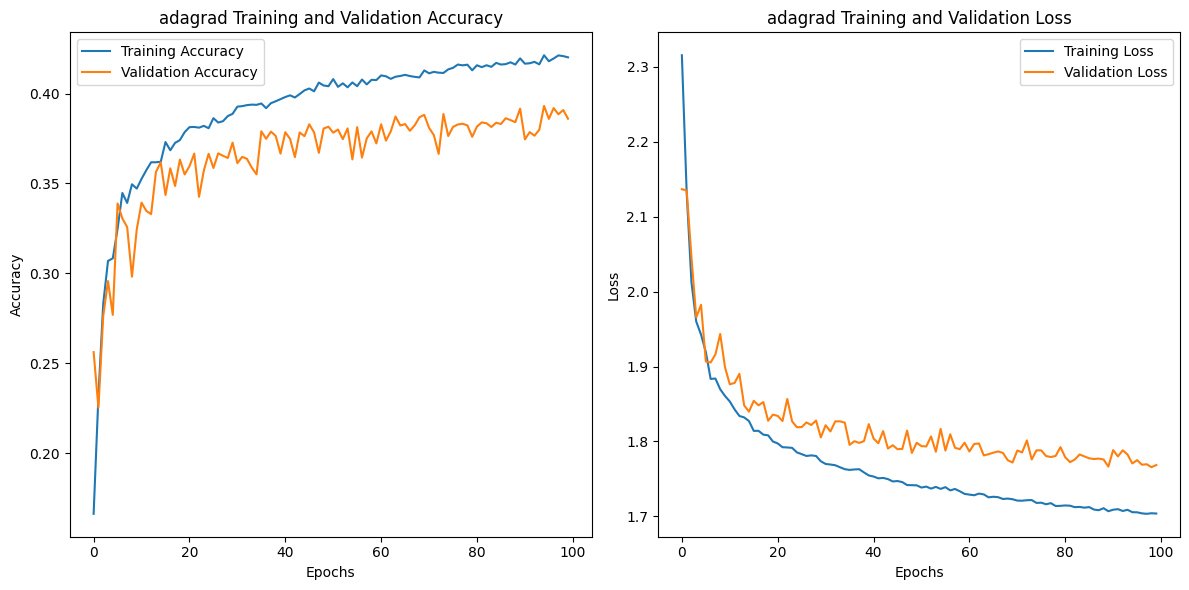

In [9]:
#Visualize Adagrad Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_adagrad.history['accuracy'], label='Training Accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label='Validation Accuracy')
plt.title('adagrad Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_adagrad.history['loss'], label='Training Loss')
plt.plot(history_adagrad.history['val_loss'], label='Validation Loss')
plt.title('adagrad Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#4- RMSProp Optimizer
from tensorflow.keras.optimizers import RMSprop

# Compile the model with RMSProp
model_rmsprop = create_shallow_model()
rmsprop_optimizer = RMSprop(learning_rate=0.001)
model_rmsprop.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_rmsprop = model_rmsprop.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024
)
end_time = time.time()

# Record training time
rmsprop_training_time = end_time - start_time
print(f"Training time with RMSProp: {rmsprop_training_time:.2f} seconds")


Epoch 1/100
25/25 [==============================] - 2s 55ms/step - loss: 2.6782 - accuracy: 0.1482 - val_loss: 2.3675 - val_accuracy: 0.1927
Epoch 2/100
25/25 [==============================] - 1s 28ms/step - loss: 2.2440 - accuracy: 0.2216 - val_loss: 2.2289 - val_accuracy: 0.2045
Epoch 3/100
25/25 [==============================] - 1s 24ms/step - loss: 2.1791 - accuracy: 0.2487 - val_loss: 2.0288 - val_accuracy: 0.2612
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 2.1443 - accuracy: 0.2642 - val_loss: 2.0895 - val_accuracy: 0.2671
Epoch 5/100
25/25 [==============================] - 1s 24ms/step - loss: 2.1232 - accuracy: 0.2784 - val_loss: 2.1659 - val_accuracy: 0.2511
Epoch 6/100
25/25 [==============================] - 1s 24ms/step - loss: 2.0998 - accuracy: 0.2810 - val_loss: 2.1609 - val_accuracy: 0.2591
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss: 2.0993 - accuracy: 0.2771 - val_loss: 2.0148 - val_accuracy: 0.2785
Epoch 

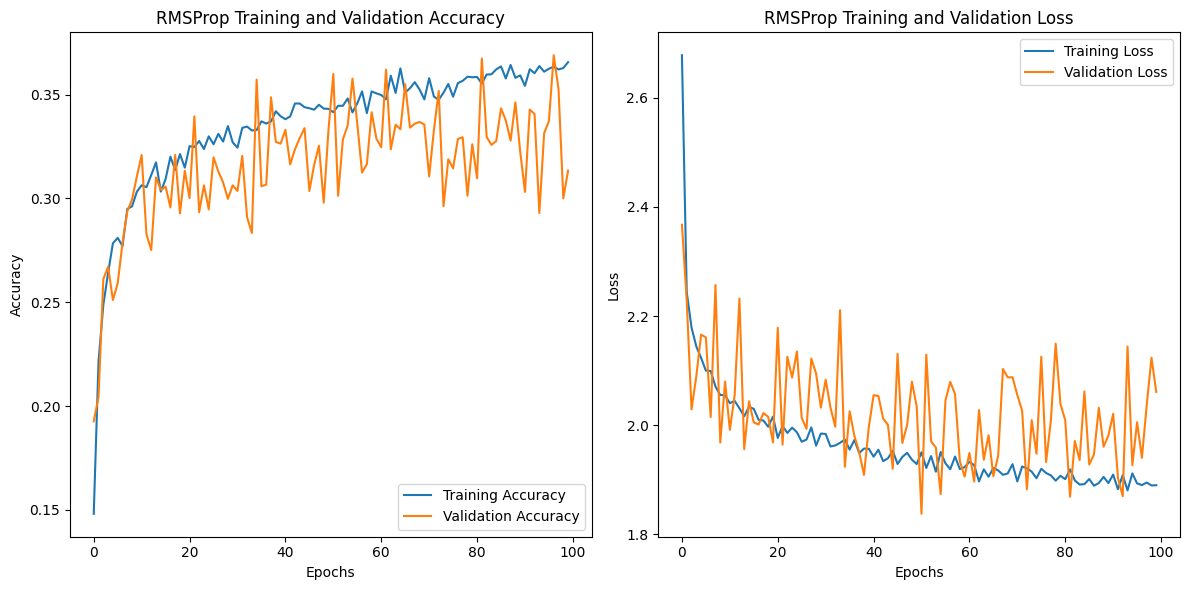

In [11]:
#Visualize RMSProp Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy')
plt.title('RMSProp Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_rmsprop.history['loss'], label='Training Loss')
plt.plot(history_rmsprop.history['val_loss'], label='Validation Loss')
plt.title('RMSProp Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
#5- Adam Optimizer
from tensorflow.keras.optimizers import Adam

# Compile the model with Adam
model_adam = create_shallow_model()
adam_optimizer = Adam(learning_rate=0.001)
model_adam.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_adam = model_adam.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024
)
end_time = time.time()

# Record training time
adam_training_time = end_time - start_time
print(f"Training time with Adam: {adam_training_time:.2f} seconds")


Epoch 1/100
25/25 [==============================] - 2s 75ms/step - loss: 2.2323 - accuracy: 0.1928 - val_loss: 2.0469 - val_accuracy: 0.2617
Epoch 2/100
25/25 [==============================] - 1s 35ms/step - loss: 1.9748 - accuracy: 0.2946 - val_loss: 1.9320 - val_accuracy: 0.3242
Epoch 3/100
25/25 [==============================] - 1s 34ms/step - loss: 1.9017 - accuracy: 0.3354 - val_loss: 1.8897 - val_accuracy: 0.3367
Epoch 4/100
25/25 [==============================] - 1s 39ms/step - loss: 1.8623 - accuracy: 0.3491 - val_loss: 1.8578 - val_accuracy: 0.3556
Epoch 5/100
25/25 [==============================] - 1s 41ms/step - loss: 1.8406 - accuracy: 0.3607 - val_loss: 1.8735 - val_accuracy: 0.3323
Epoch 6/100
25/25 [==============================] - 1s 33ms/step - loss: 1.8260 - accuracy: 0.3635 - val_loss: 1.8498 - val_accuracy: 0.3538
Epoch 7/100
25/25 [==============================] - 1s 34ms/step - loss: 1.8098 - accuracy: 0.3729 - val_loss: 1.8176 - val_accuracy: 0.3726
Epoch 

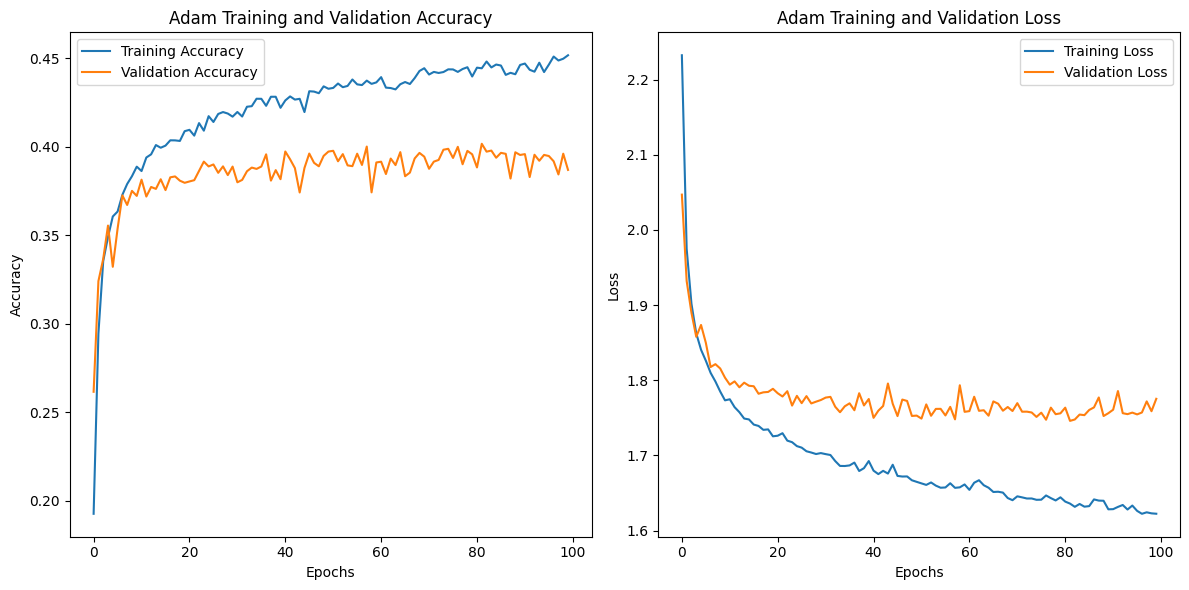

In [14]:
#Visualize Adam Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Adam Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.title('Adam Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
#6- Nadam Optimizer

from tensorflow.keras.optimizers import Nadam

# Compile the model with Nadam
model_nadam = create_shallow_model()
nadam_optimizer = Nadam(learning_rate=0.001)
model_nadam.compile(optimizer=nadam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_nadam = model_nadam.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024
)
end_time = time.time()

# Record training time
nadam_training_time = end_time - start_time
print(f"Training time with Nadam: {nadam_training_time:.2f} seconds")

Epoch 1/100
25/25 [==============================] - 2s 82ms/step - loss: 2.2439 - accuracy: 0.1831 - val_loss: 2.1115 - val_accuracy: 0.2448
Epoch 2/100
25/25 [==============================] - 1s 43ms/step - loss: 2.0511 - accuracy: 0.2680 - val_loss: 2.0529 - val_accuracy: 0.2604
Epoch 3/100
25/25 [==============================] - 1s 42ms/step - loss: 2.0111 - accuracy: 0.2854 - val_loss: 1.9573 - val_accuracy: 0.2933
Epoch 4/100
25/25 [==============================] - 1s 40ms/step - loss: 1.9389 - accuracy: 0.3122 - val_loss: 2.0385 - val_accuracy: 0.2906
Epoch 5/100
25/25 [==============================] - 1s 38ms/step - loss: 1.9297 - accuracy: 0.3184 - val_loss: 1.9783 - val_accuracy: 0.2780
Epoch 6/100
25/25 [==============================] - 1s 39ms/step - loss: 1.9219 - accuracy: 0.3245 - val_loss: 1.9838 - val_accuracy: 0.2964
Epoch 7/100
25/25 [==============================] - 1s 38ms/step - loss: 1.8756 - accuracy: 0.3423 - val_loss: 1.8695 - val_accuracy: 0.3404
Epoch 

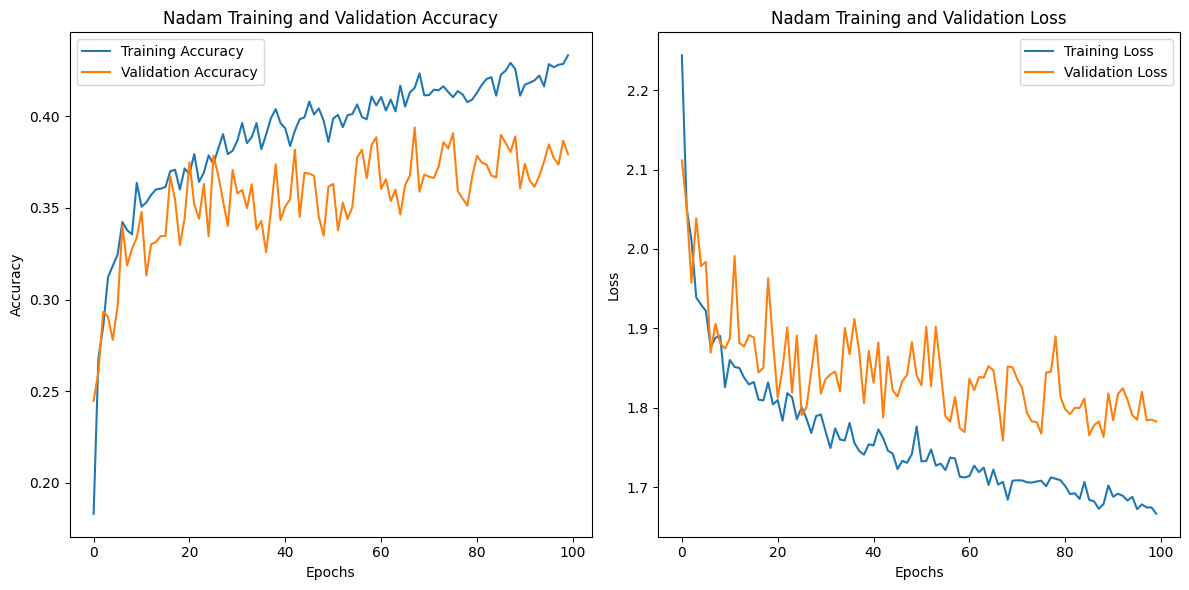

In [16]:
#Visualize Nadam Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_nadam.history['accuracy'], label='Training Accuracy')
plt.plot(history_nadam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Nadam Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_nadam.history['loss'], label='Training Loss')
plt.plot(history_nadam.history['val_loss'], label='Validation Loss')
plt.title('Nadam Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
#7- Exponential decay scheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay


# Create and summarize the model
Exp_decay_model = create_shallow_model()

## Set up the exponential decay scheduler
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,  # Adjust based on your dataset size
    decay_rate=0.96,
    staircase=True
)
# Compile the model with the exponential decay learning rate scheduler
optimizer=SGD(learning_rate=0.01)
Exp_decay_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history_exp_decay = Exp_decay_model.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024
)
end_time = time.time()

# Record training time
exp_decay_training_time = end_time - start_time
print(f"Training time with Nadam: {exp_decay_training_time:.2f} seconds")

Epoch 1/100
25/25 [==============================] - 2s 64ms/step - loss: 2.2565 - accuracy: 0.1785 - val_loss: 2.1823 - val_accuracy: 0.2222
Epoch 2/100
25/25 [==============================] - 1s 26ms/step - loss: 2.1393 - accuracy: 0.2355 - val_loss: 2.1137 - val_accuracy: 0.2398
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 2.0809 - accuracy: 0.2625 - val_loss: 2.0629 - val_accuracy: 0.2700
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 2.0390 - accuracy: 0.2794 - val_loss: 2.0300 - val_accuracy: 0.2764
Epoch 5/100
25/25 [==============================] - 1s 22ms/step - loss: 2.0097 - accuracy: 0.2938 - val_loss: 2.0049 - val_accuracy: 0.2914
Epoch 6/100
25/25 [==============================] - 1s 22ms/step - loss: 1.9865 - accuracy: 0.3048 - val_loss: 1.9828 - val_accuracy: 0.3084
Epoch 7/100
25/25 [==============================] - 1s 22ms/step - loss: 1.9679 - accuracy: 0.3146 - val_loss: 1.9682 - val_accuracy: 0.3095
Epoch 

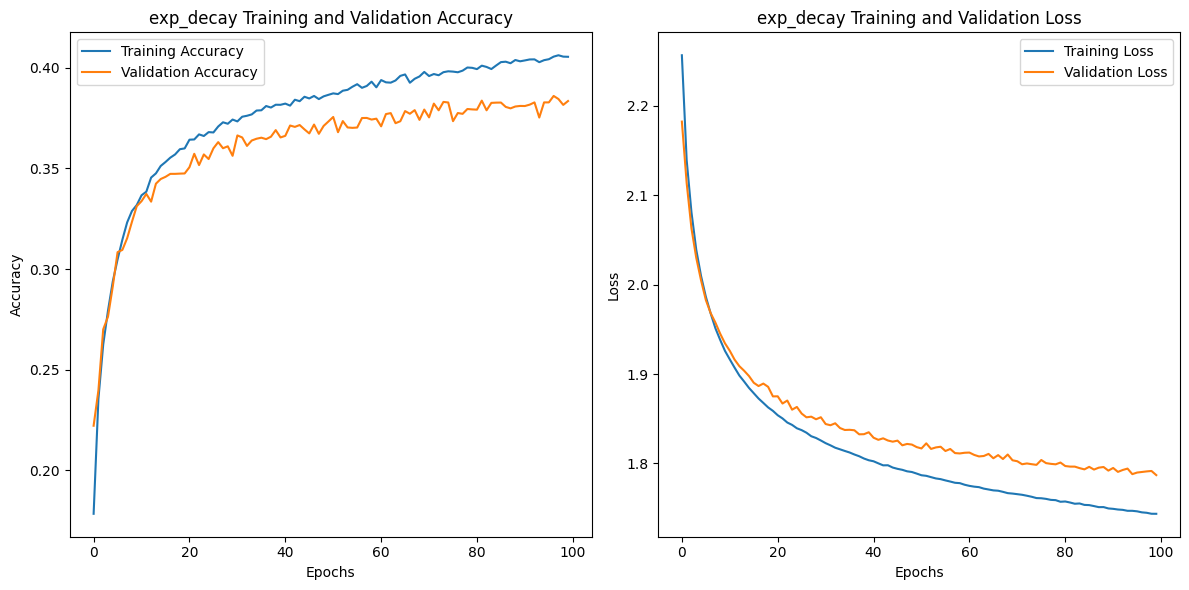

In [18]:
#Visualize exp_decay Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_exp_decay.history['accuracy'], label='Training Accuracy')
plt.plot(history_exp_decay.history['val_accuracy'], label='Validation Accuracy')
plt.title('exp_decay Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_exp_decay.history['loss'], label='Training Loss')
plt.plot(history_exp_decay.history['val_loss'], label='Validation Loss')
plt.title('exp_decay Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#8- Step decay scheduler

from tensorflow.keras.callbacks import LearningRateScheduler

# Define the step_decay function
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Create and compile the model
step_decay_model = create_shallow_model()

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Compile the model with the SGD optimizer (no learning rate specified here)
optimizer = SGD(learning_rate=0.01)  # Let the LearningRateScheduler handle the learning rate
step_decay_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the LearningRateScheduler callback
start_time = time.time()
history_step_decay = step_decay_model.fit(
    x_train, y_train,
    validation_split=0.5,
    epochs=100,
    batch_size=1024,
    callbacks=[lr_scheduler]  # Pass the scheduler as a callback
)

# Record training time
end_time = time.time()
step_decay_training_time = end_time - start_time
print(f"Training time with Step Decay: {step_decay_training_time:.2f} seconds")

Epoch 1/100
25/25 [==============================] - 2s 77ms/step - loss: 2.3671 - accuracy: 0.1100 - val_loss: 2.3483 - val_accuracy: 0.1110 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 1s 35ms/step - loss: 2.3362 - accuracy: 0.1146 - val_loss: 2.3268 - val_accuracy: 0.1195 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 1s 34ms/step - loss: 2.3159 - accuracy: 0.1246 - val_loss: 2.3080 - val_accuracy: 0.1281 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 1s 34ms/step - loss: 2.2972 - accuracy: 0.1358 - val_loss: 2.2907 - val_accuracy: 0.1382 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 1s 34ms/step - loss: 2.2802 - accuracy: 0.1455 - val_loss: 2.2743 - val_accuracy: 0.1472 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 1s 33ms/step - loss: 2.2643 - accuracy: 0.1543 - val_loss: 2.2591 - val_accuracy: 0.1561 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 1s 33ms/step - lo

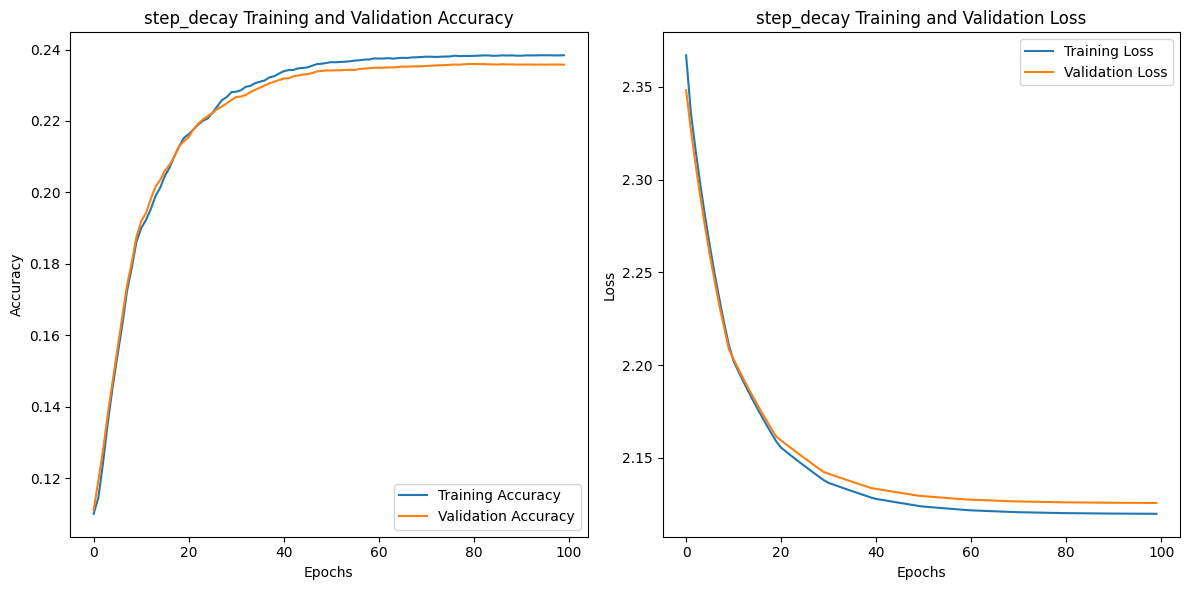

In [20]:
#Visualize exp_decay Training and Validation Accuracy and Loss

# Assuming history is the object returned from model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_step_decay.history['accuracy'], label='Training Accuracy')
plt.plot(history_step_decay.history['val_accuracy'], label='Validation Accuracy')
plt.title('step_decay Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_step_decay.history['loss'], label='Training Loss')
plt.plot(history_step_decay.history['val_loss'], label='Validation Loss')
plt.title('step_decay Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


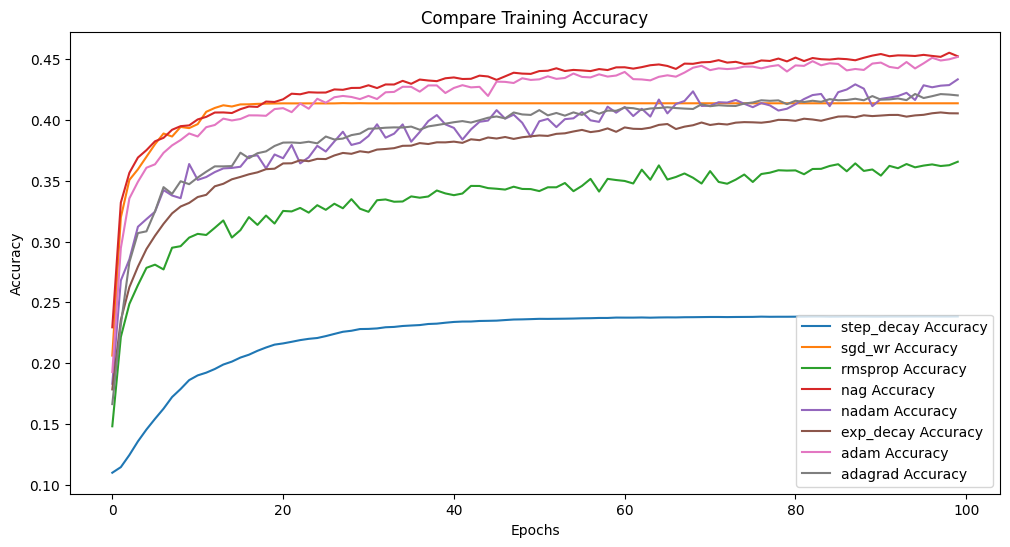

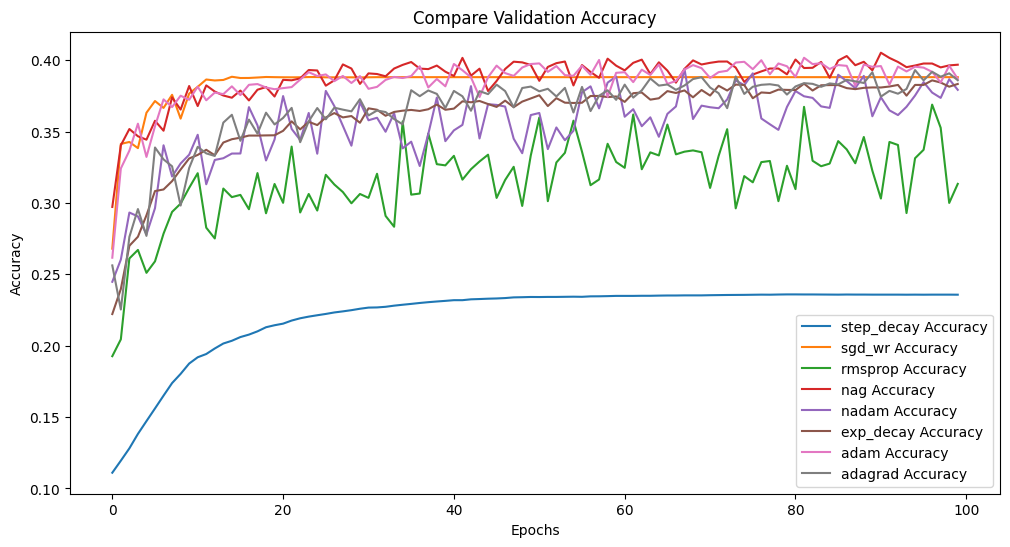

In [22]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_step_decay.history['accuracy'], label='step_decay Accuracy')
plt.plot(history_sgd_wr.history['accuracy'], label='sgd_wr Accuracy')
plt.plot(history_rmsprop.history['accuracy'], label='rmsprop Accuracy')
plt.plot(history_nag.history['accuracy'], label='nag Accuracy')
plt.plot(history_nadam.history['accuracy'], label='nadam Accuracy')
plt.plot(history_exp_decay.history['accuracy'], label='exp_decay Accuracy')
plt.plot(history_adam.history['accuracy'], label='adam Accuracy')
plt.plot(history_adagrad.history['accuracy'], label='adagrad Accuracy')
plt.title('Compare Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(history_step_decay.history['val_accuracy'], label='step_decay Accuracy')
plt.plot(history_sgd_wr.history['val_accuracy'], label='sgd_wr Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='rmsprop Accuracy')
plt.plot(history_nag.history['val_accuracy'], label='nag Accuracy')
plt.plot(history_nadam.history['val_accuracy'], label='nadam Accuracy')
plt.plot(history_exp_decay.history['val_accuracy'], label='exp_decay Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='adam Accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label='adagrad Accuracy')
plt.title('Compare Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()